In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv("../data\\Titanic-Dataset.csv")
print("Dataset Loaded Successfully!")
df.head()


Dataset Loaded Successfully!


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
# 1. Shape, Columns, Data Types
# -----------------------
print("\nShape of dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nData types:\n", df.dtypes)


Shape of dataset: (891, 12)

Column names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Data types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [49]:
# 2. Missing Values
# -----------------------
print("\nMissing values count:\n", df.isnull().sum())


Missing values count:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [50]:
# Example handling: numeric → median, categorical → mode
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after handling:\n", df.isnull().sum())


Missing values after handling:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


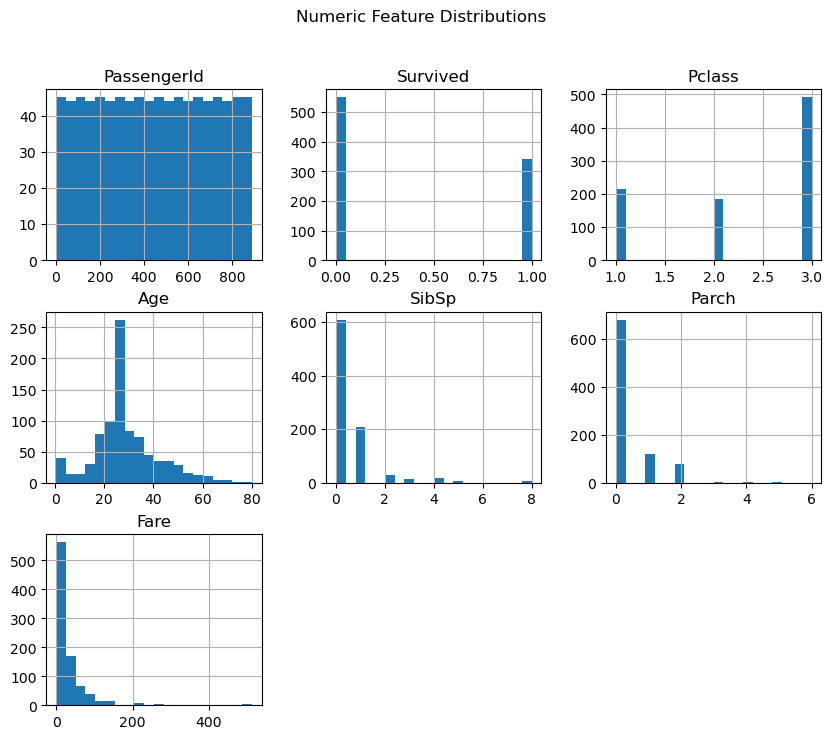

In [51]:
# 3. Basic Visualisations
# -----------------------
# Histogram for numeric features
df.hist(bins=20, figsize=(10, 8))
plt.suptitle("Numeric Feature Distributions")
plt.show()


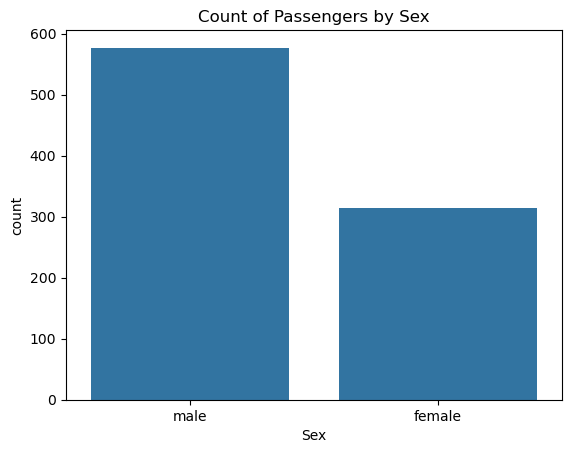

In [52]:
# Countplot for categorical feature (Example: 'Sex')
if 'Sex' in df.columns:
    sns.countplot(x='Sex', data=df)
    plt.title("Count of Passengers by Sex")
    plt.show()

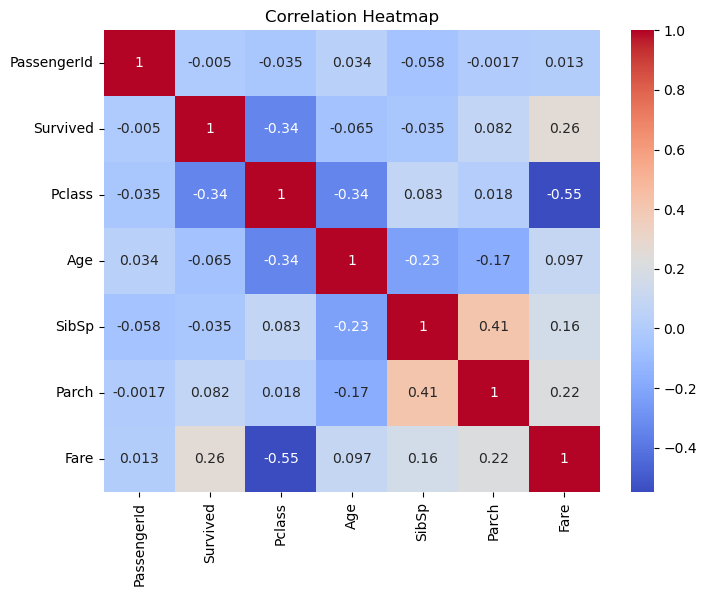

In [53]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [54]:
# Feature Engineering
# ------------------------------

# Convert categorical variables to numeric (One-Hot Encoding)
cat_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("\nData after encoding:\n", df.head())


Data after encoding:
    PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  \
0            1         0       3  22.0      1      0   7.2500   
1            2         1       1  38.0      1      0  71.2833   
2            3         1       3  26.0      0      0   7.9250   
3            4         1       1  35.0      1      0  53.1000   
4            5         0       3  35.0      0      0   8.0500   

   Name_Abbott, Mr. Rossmore Edward  Name_Abbott, Mrs. Stanton (Rosa Hunt)  \
0                             False                                  False   
1                             False                                  False   
2                             False                                  False   
3                             False                                  False   
4                             False                                  False   

   Name_Abelson, Mr. Samuel  ...  Cabin_F G63  Cabin_F G73  Cabin_F2  \
0                     False  ...        False

In [55]:
# Train-Test Split
# Change 'Survived' to your dataset's target column name
target_column = 'Survived'  
X = df.drop(target_column, axis=1)
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (712, 1725)
Testing set shape: (179, 1725)


Step 3: Model Training

In [56]:

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import joblib

In [57]:
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Name_Abbott, Mr. Rossmore Edward',
       'Name_Abbott, Mrs. Stanton (Rosa Hunt)', 'Name_Abelson, Mr. Samuel',
       ...
       'Cabin_F G63', 'Cabin_F G73', 'Cabin_F2', 'Cabin_F33', 'Cabin_F38',
       'Cabin_F4', 'Cabin_G6', 'Cabin_T', 'Embarked_Q', 'Embarked_S'],
      dtype='object', length=1726)


In [58]:
# Features and target
X = df.drop(['PassengerId', 'Survived'], axis=1)
y = df['Survived']


In [59]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Models
rf_model = RandomForestClassifier(random_state=42)
log_model = LogisticRegression(max_iter=1000, random_state=42)

In [61]:
# Cross-validation scores
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
log_cv_scores = cross_val_score(log_model, X_train, y_train, cv=5)

print("Random Forest CV Mean:", rf_cv_scores.mean())
print("Logistic Regression CV Mean:", log_cv_scores.mean())

Random Forest CV Mean: 0.8202107751403526
Logistic Regression CV Mean: 0.8061459667093469


In [62]:
# Select best model
if rf_cv_scores.mean() > log_cv_scores.mean():
    best_model = rf_model
    best_name = "Random Forest"
else:
    best_model = log_model
    best_name = "Logistic Regression"

print(f"✅ Best model: {best_name}")

✅ Best model: Random Forest


In [63]:
# Train best model on full training data
best_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [64]:
# Save trained model
import os

# Make sure models directory exists
os.makedirs("../models", exist_ok=True)

# Save trained model
joblib.dump(best_model, "../models/best_model.joblib")
print("💾 Model saved to ../models/best_model.joblib")


💾 Model saved to ../models/best_model.joblib
